In [84]:
import pyodbc

In [86]:
import pandas as pd

In [88]:
cnxn_str= ("Driver={ODBC Driver 17 for SQL Server};"
"Server=Abdelrahman;"
"Database=Feedback_DW;"
"Trusted_Connection=yes;")

In [90]:
cnxn = pyodbc.connect(cnxn_str)

In [92]:
cursor = cnxn.cursor()

In [94]:
!pip install pandas matplotlib seaborn

In [95]:
cursor.execute("Select * from dbo.dim_agent")
Agent=pd.read_sql("Select * from dbo.dim_agent ", pyodbc.connect(cnxn_str))

C:\Users\abdel\AppData\Local\Temp\ipykernel_19068\4120819072.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Agent=pd.read_sql("Select * from dbo.dim_agent ", pyodbc.connect(cnxn_str))


In [96]:
cursor.execute("Select * from dbo.dim_customer")
customer=pd.read_sql("Select * from dbo.dim_customer ", pyodbc.connect(cnxn_str))

C:\Users\abdel\AppData\Local\Temp\ipykernel_19068\2511279031.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  customer=pd.read_sql("Select * from dbo.dim_customer ", pyodbc.connect(cnxn_str))


In [97]:
cursor.execute("Select * from dbo.dim_location")
location=pd.read_sql("Select * from dbo.dim_location ", pyodbc.connect(cnxn_str))

C:\Users\abdel\AppData\Local\Temp\ipykernel_19068\3685299614.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  location=pd.read_sql("Select * from dbo.dim_location ", pyodbc.connect(cnxn_str))


In [98]:
cursor.execute("Select * from dbo.dim_time")
time=pd.read_sql("Select * from dbo.dim_time ", pyodbc.connect(cnxn_str))

C:\Users\abdel\AppData\Local\Temp\ipykernel_19068\422578048.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  time=pd.read_sql("Select * from dbo.dim_time ", pyodbc.connect(cnxn_str))


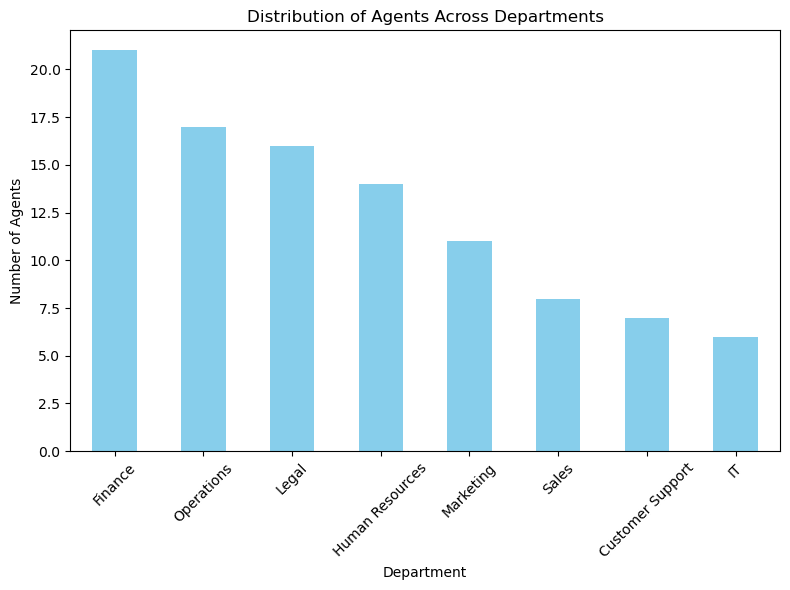

In [99]:
department_distribution = Agent['department'].value_counts()

# Plotting the distribution of agents across departments
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
department_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Agents Across Departments')
plt.xlabel('Department')
plt.ylabel('Number of Agents')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

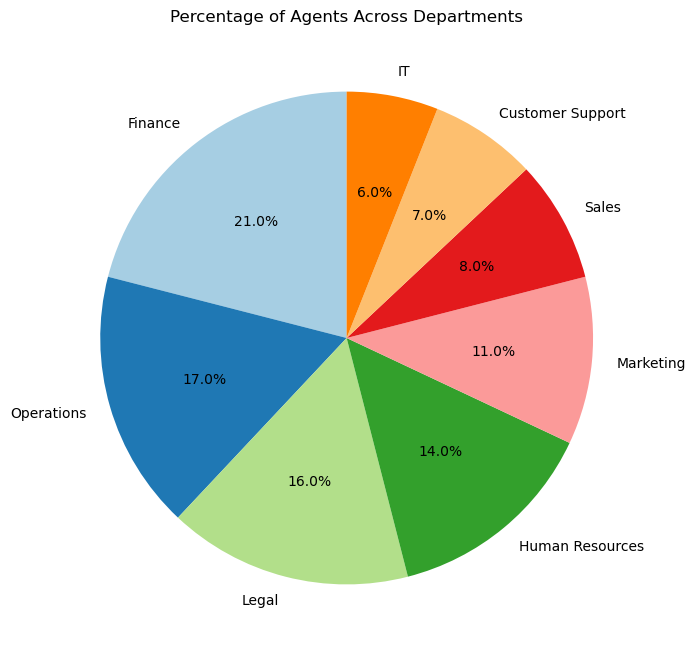

In [100]:
# Creating a pie chart to visualize the distribution of agents across departments
plt.figure(figsize=(8, 8))
department_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Percentage of Agents Across Departments')
plt.ylabel('')  # Removing the y-label for better visual clarity

# Show the plot
plt.show()


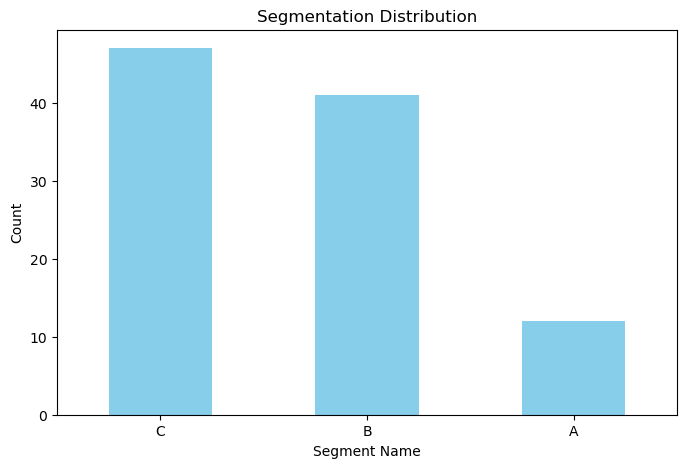

In [101]:
import matplotlib.pyplot as plt

# Count distribution of segment_name and gender
segment_distribution = customer['segment_name'].value_counts()
gender_distribution = customer['gender'].value_counts()

# Plot bar chart for segment_name distribution
plt.figure(figsize=(8, 5))
segment_distribution.plot(kind='bar', color='skyblue')
plt.title('Segmentation Distribution')
plt.xlabel('Segment Name')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()



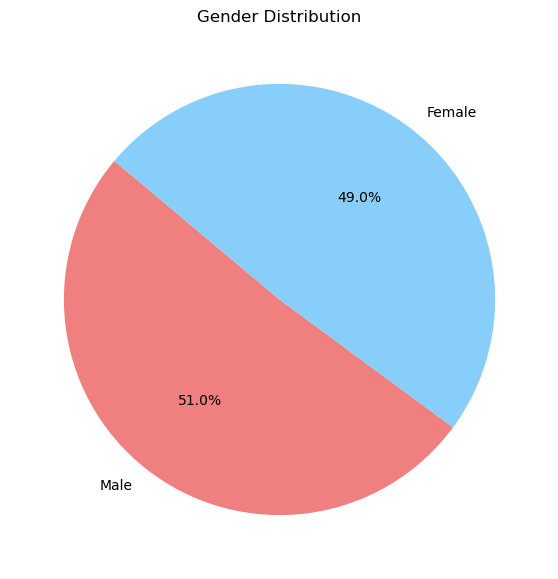

In [102]:
# Plot pie chart for gender distribution
plt.figure(figsize=(7, 7))
gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue'])
plt.title('Gender Distribution')
plt.ylabel('')  # Hide y-label for pie chart
plt.show()



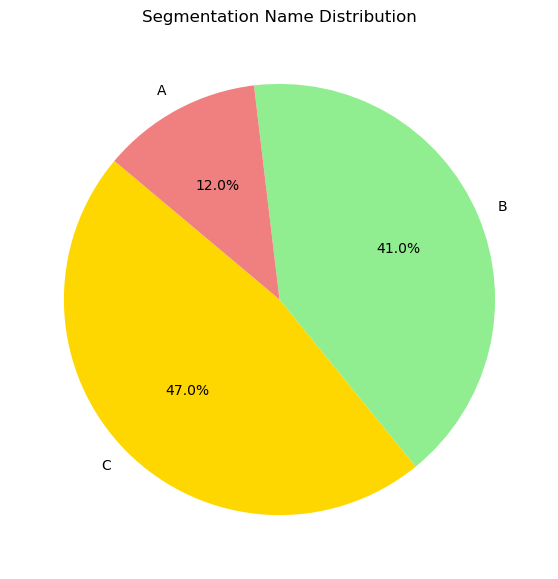

In [103]:
# Plot pie chart for segmentation distribution
plt.figure(figsize=(7, 7))
segment_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['gold', 'lightgreen', 'lightcoral', 'lightskyblue'])
plt.title('Segmentation Name Distribution')
plt.ylabel('')  # Hide y-label for pie chart
plt.show()


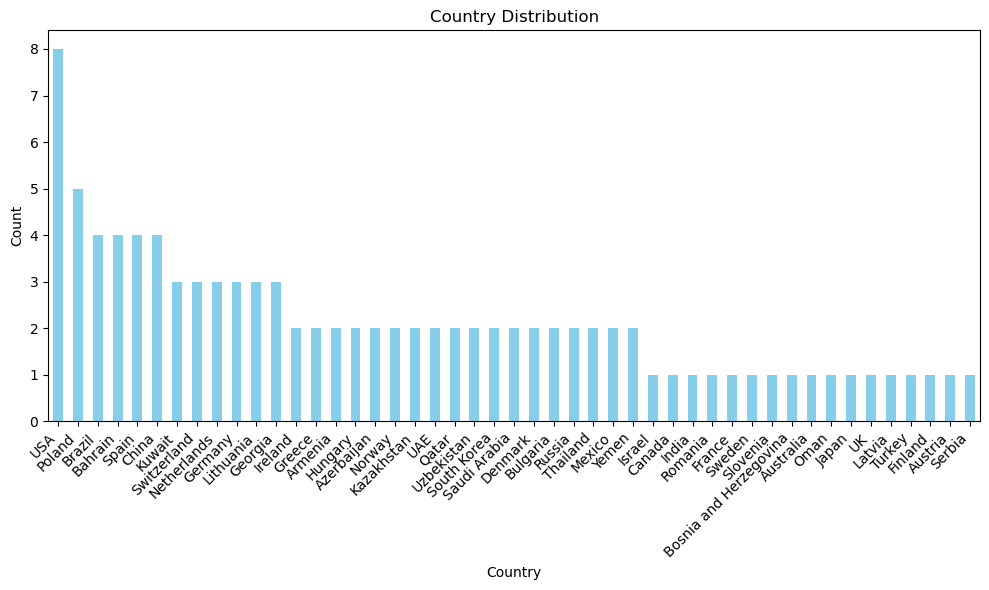

In [104]:
import matplotlib.pyplot as plt

# Count occurrences of each country
country_counts = location['country'].value_counts()

# Create a bar chart for the country distribution
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='skyblue')
plt.title('Country Distribution')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [105]:
# Define a mapping from countries to continents
continent_map = {
    'Brazil': 'South America',
    'Poland': 'Europe',
    'Germany': 'Europe',
    'Saudi Arabia': 'Asia',
    'Slovenia': 'Europe',
    'Netherlands': 'Europe',
    'Oman': 'Asia',
    'Japan': 'Asia',
    'Kuwait': 'Asia',
    'Australia': 'Asia',
    'Switzerland': 'Europe',
    'Georgia': 'Asia',
    'Mexico': 'North America',
    'Thailand': 'Asia',
    'Russia': 'Europe',
    'Bulgaria': 'Europe',
    'Spain': 'Europe',
    'Bahrain': 'Asia',
    'Lithuania': 'Europe',
    'Denmark': 'Europe',
    'Yemen': 'Asia',
    'Israel': 'Asia',
    'South Korea': 'Asia',
    'China': 'Asia',
    'Austria': 'Europe',
    'Finland': 'Europe',
    'USA': 'North America',
    'Turkey': 'Asia',
    'Kazakhstan': 'Asia',
    'Latvia': 'Europe',
    'India': 'Asia',
    'Canada': 'North America',
    'Italy': 'Europe',
    'Sweden': 'Europe',
    'France': 'Europe',
    'Romania': 'Europe',
    'Qatar': 'Asia',
    'Armenia': 'Asia',
    'Serbia': 'Europe',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'Czech Republic': 'Europe',
    'Belarus': 'Europe',
    'Ukraine': 'Europe'
}

# Map the countries to continents
location['continent'] = location['country'].map(continent_map)



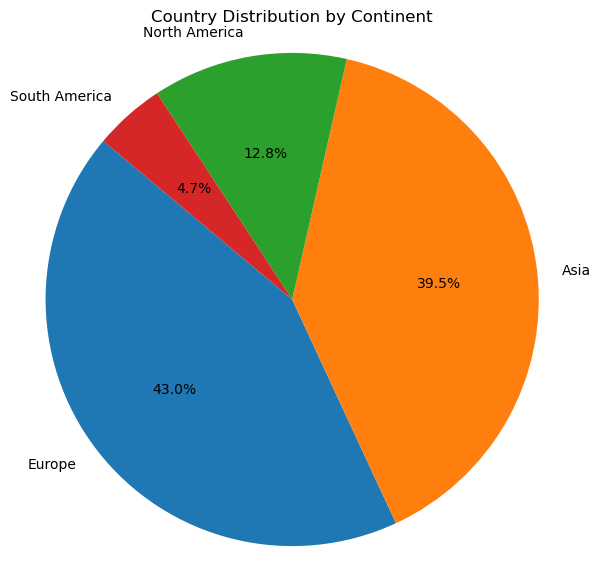

In [106]:
# Count the occurrences of each continent
continent_distribution = location['continent'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(7, 7))
plt.pie(continent_distribution, labels=continent_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Country Distribution by Continent')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

C:\Users\abdel\AppData\Local\Temp\ipykernel_19068\3596068483.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_distribution.index, y=month_distribution.values, palette='viridis')


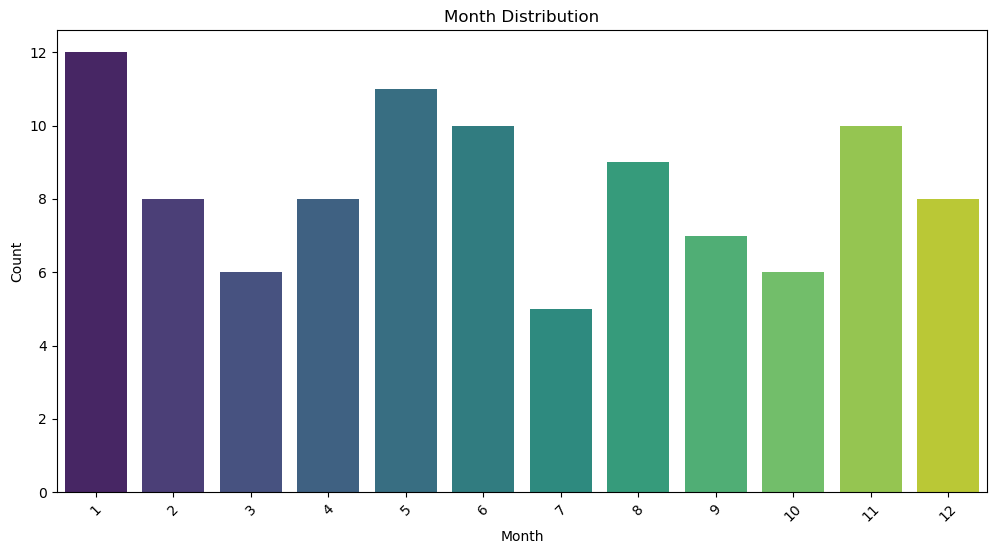

In [107]:
# Count the occurrences of each month
month_distribution = time['month'].value_counts().sort_index()

# Plotting the month distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=month_distribution.index, y=month_distribution.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Month Distribution')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

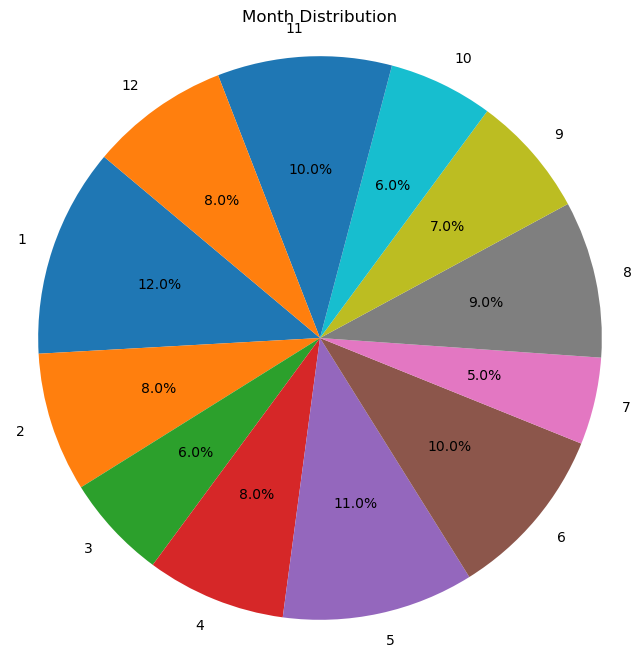

In [108]:
# Plotting the pie chart for month distribution
plt.figure(figsize=(8, 8))
plt.pie(month_distribution, labels=month_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Month Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

In [109]:
# Count the occurrences of each year
year_distribution = time['year'].value_counts().sort_index()

# Display the year distribution
print(year_distribution)

year
2020    21
2021    17
2022    24
2023    21
2024    17
Name: count, dtype: int64


C:\Users\abdel\AppData\Local\Temp\ipykernel_19068\47454387.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year_distribution.index, y=year_distribution.values, palette='coolwarm')


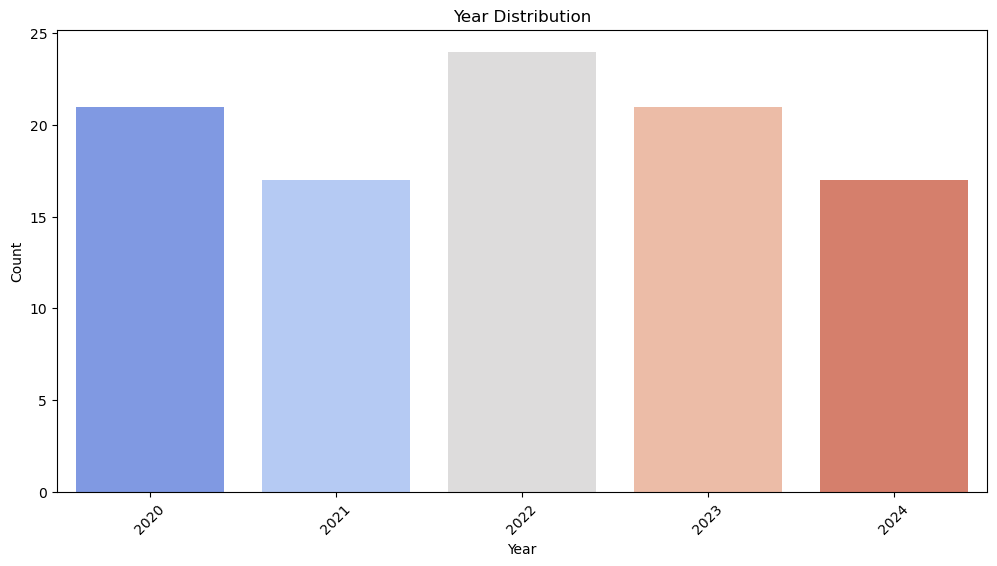

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the year distribution as a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=year_distribution.index, y=year_distribution.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Year Distribution')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()